# Clustering

In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_json('posts.json')

In [3]:
df


,descripcion,fecha
0,👀 DataRobot has some big product news. You won...,13-03-2023
1,We are delighted to co-host an executive forum...,13-03-2023
2,🔑 As you grow and optimize your business with ...,13-03-2023
3,⏰ We are going live in one hour! Join Brent Hi...,13-03-2023
4,Another awesome breakout session not to be mis...,13-03-2023
...,...,...
196,Remember how Dr. Heinz Doofenshmirtz could nev...,29-03-2023
197,Are you a machine learning enthusiast looking ...,29-03-2023
198,Why did the junior developer cross the road?\n...,29-03-2023
199,Experience the Power of AI Angle Tracking for ...,29-03-2023


In [4]:
corpus=df["descripcion"].values.tolist()
print(corpus)

['👀 DataRobot has some big product news. You won’t want to miss one of the most exciting product launches in our history! Learn how you can drive business value with the new and exciting capabilities in the DataRobot AI Platform. Register today. #AIVisiontoValue\n\nhttps://bit.ly/412fyXR', 'We are delighted to co-host an executive forum with stc on March 14, bringing together #AI experts to discuss how to accelerate and drive value from AI.\n\nRegister now ⬇️\nhttps://lnkd.in/gbUXHjCk\n', '🔑 As you grow and optimize your business with #AI, it is key that you deliver models that you can trust and defend over time. Join the March 16 Breakout Session with Brian Bell Jr. to learn more about the new governance capabilities in the DataRobot AI Platform. Register today:\n\nhttps://bit.ly/412fyXR\n\n#AIVisiontoValue\n', '⏰ We are going live in one hour! Join Brent Hinks, Senior Pre-Sales Data Scientist, for a discussion on how to execute an end-to-end data science workflow on DataRobot orchest

## Tokenizacion sin lemmatizer

In [5]:
import nltk
nltk.download('punkt')

corpus_tok = [nltk.word_tokenize(sent) for sent in corpus]
corpus_tok

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ynino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['👀',
  'DataRobot',
  'has',
  'some',
  'big',
  'product',
  'news',
  '.',
  'You',
  'won',
  '’',
  't',
  'want',
  'to',
  'miss',
  'one',
  'of',
  'the',
  'most',
  'exciting',
  'product',
  'launches',
  'in',
  'our',
  'history',
  '!',
  'Learn',
  'how',
  'you',
  'can',
  'drive',
  'business',
  'value',
  'with',
  'the',
  'new',
  'and',
  'exciting',
  'capabilities',
  'in',
  'the',
  'DataRobot',
  'AI',
  'Platform',
  '.',
  'Register',
  'today',
  '.',
  '#',
  'AIVisiontoValue',
  'https',
  ':',
  '//bit.ly/412fyXR'],
 ['We',
  'are',
  'delighted',
  'to',
  'co-host',
  'an',
  'executive',
  'forum',
  'with',
  'stc',
  'on',
  'March',
  '14',
  ',',
  'bringing',
  'together',
  '#',
  'AI',
  'experts',
  'to',
  'discuss',
  'how',
  'to',
  'accelerate',
  'and',
  'drive',
  'value',
  'from',
  'AI',
  '.',
  'Register',
  'now',
  '⬇️',
  'https',
  ':',
  '//lnkd.in/gbUXHjCk'],
 ['🔑',
  'As',
  'you',
  'grow',
  'and',
  'optimize',
  'y

In [6]:
from gensim.models import Word2Vec

# Define los parámetros de tu modelo personalizado
vector_size = 100
window_size = 5

# Construye el vocabulario de tu modelo utilizando las palabras del corpus tokenizado
model = Word2Vec(corpus_tok, vector_size=vector_size, window=window_size, min_count=1)

# Entrena el modelo Word2Vec con el corpus tokenizado
model.train(corpus_tok, total_examples=len(corpus_tok), epochs=500)

# Guarda el modelo entrenado para su uso posterior
model.save("mi_modelo_word2vec.model")

In [7]:
vector = model.wv['nlp']
vector

array([ 0.01293891,  0.40104693, -0.18950336,  0.3316936 ,  0.16997765,
       -2.0305398 , -1.0227842 ,  1.2605472 , -0.463107  , -0.33200663,
       -0.04307072, -2.3268332 , -0.52073205,  0.7042686 ,  0.29878065,
       -0.09438713, -0.38128316, -0.49384525, -0.04556483, -1.3666795 ,
        1.1186578 ,  0.7173768 ,  0.36755168, -0.47181058,  0.24195285,
       -0.5100377 , -0.94071215, -0.47391883, -0.31753406, -0.01826638,
       -0.18882632,  0.73839897, -0.2131581 , -0.44119087,  0.36871025,
        1.3141699 , -0.48970625, -1.4202605 , -1.2297403 , -1.2906818 ,
       -0.2962122 , -0.03316577, -0.56446165, -1.4494549 ,  0.21220146,
        1.0588114 , -0.1852783 ,  0.36268887, -0.69995403,  1.1836143 ,
       -0.03144576, -1.0813143 , -1.2246821 , -0.8923976 , -0.3812813 ,
       -0.3673761 ,  2.0364192 , -0.42748904, -0.87584364,  0.26952356,
       -0.11916569, -0.5040438 ,  0.17879617, -0.19088279, -0.4429257 ,
        1.5538765 ,  0.88210166,  0.85869956, -1.8023568 ,  1.64

In [8]:
similares = model.wv.most_similar('chatbot')
similares

[('nlp', 0.9924628138542175),
 ('openai', 0.9877042770385742),
 ('aiplane', 0.9818591475486755),
 ('aiplanet', 0.9663073420524597),
 ('chatgpt', 0.9598594307899475),
 ('dataclassification', 0.9066474437713623),
 ('unsupervisedlearning', 0.8986711502075195),
 ('quora', 0.8897806406021118),
 ('cheatsheet', 0.887108325958252),
 ('deepmind', 0.8822941780090332)]

In [9]:
similitud = model.wv.similarity('chatbot', 'nlp')
similitud

0.9924629

In [10]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

## K-Means clustering

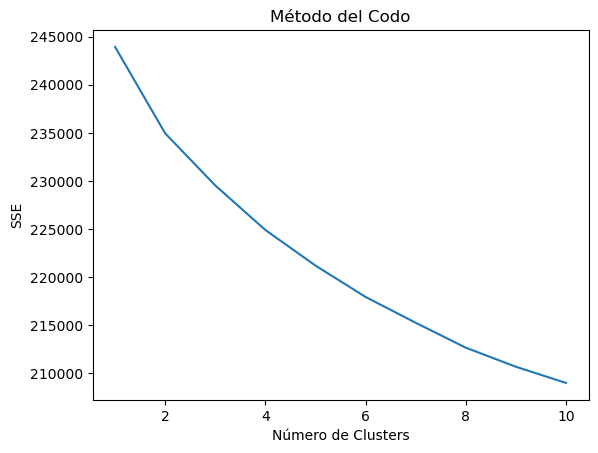

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(word_vectors)
    sse.append(kmeans.inertia_)

# Graficar la curva SSE vs. k
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [22]:
# Aplicar el algoritmo K-Means a la matriz de características
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(word_vectors)

# obtener las etiquetas de los clusters para cada punto en el espacio 2D producido por PCA
labels = kmeans.predict(word_vectors)

# crear un diccionario para almacenar las palabras por cluster
clusters = {}

# agregar cada palabra al cluster correspondiente
for i, word in enumerate(model.wv.index_to_key):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(word)

# imprimir palabras por cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {words}")

Cluster 0: ['#', ',', '.', 'to', ':', 'the', 'and', 'https', 'a', 'of', 'in', 'AI', '!', 'for', 'your', 'on', 'you', 'with', 'this', 'data', 'is', 'at', 'more', 'our', 'how', '?', 'Data', "'s", 'from', 'Join', 'learn', 'can', '’', 'are', 'learning', 'who', 'out', 'that', 'it', 'us', 'know', 'we', 'We', '-', 'Register', 'by', 'about', 'machine', 'now', 'will', 'an', 'as', 'SQL', 'their', 'today', 's', 'be', 'should', 'science', 'March', "n't", 'say', 'happy', 'GTC23', 'DataRobot', '&', 'new', 'Learn.MachineLearning', 'all', 'Learn', 'Do', 'NVIDIA', 'day', 'Check', 'skills', 'help', 'industry', 'Science', 'miss', 'intelligence', 'artificial', 'event', 'every', 'these', 'ML', 'insights', '5', 'what', 'here', 'its', 'do', 'up', 'ways', 'Global', 'future', 'get', 'make', 'into', 'explore', 'have', 'revolutionizing', 'technology', 'world', 'take', 'business', 'full', 'leaders', 'using', 'need', 'next', 'gain', 'session', 'level', 'Are', 'career', 'some', 'Here', 'value', 'Our', 'than', 'You'

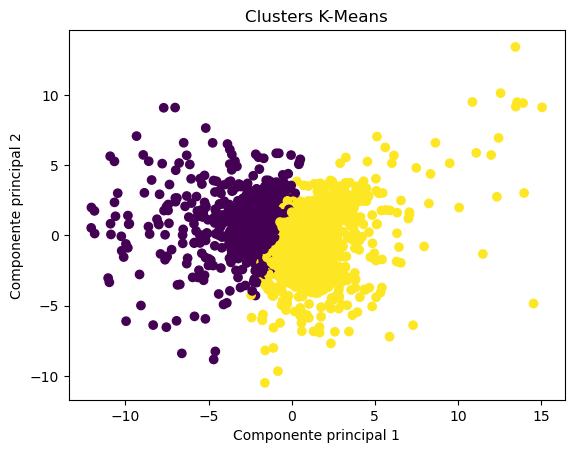

In [23]:
from sklearn.decomposition import PCA
# Reducir la dimensionalidad de la matriz de características TF-IDF a 2 dimensiones utilizando PCA
pca = PCA(n_components=2, random_state=0)
word_vectors_2d = pca.fit_transform(word_vectors)

# Graficar los puntos de datos coloreados por su asignación a cada cluster
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

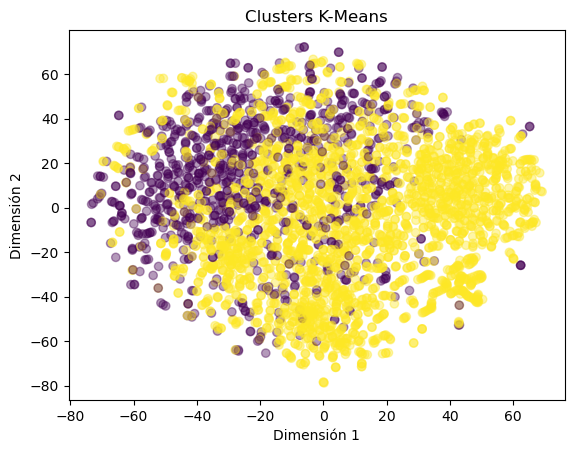

In [25]:
from sklearn.manifold import TSNE
# Reducir la dimensionalidad de la matriz de características TF-IDF a 2 dimensiones utilizando t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Graficar los puntos de datos coloreados por su asignación a cada cluster
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.4)
plt.title('Clusters K-Means')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

## LSA: Latent Semantic Analysis

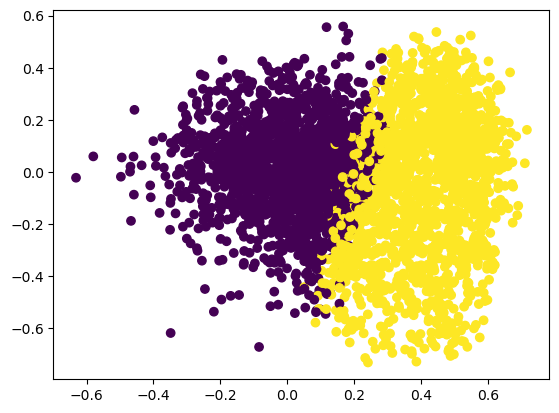

In [29]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from time import time


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(word_vectors)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_lsa)

# Obtener los clusters asignados a cada palabra
clusters = kmeans.labels_

# Graficar los vectores reducidos con colores diferentes para cada cluster
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=clusters)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Reducir la dimensionalidad de la matriz de características TF-IDF a 2 dimensiones utilizando PCA
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_lsa)

# Graficar los puntos de datos coloreados por su asignación a cada cluster
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

<Axes: >

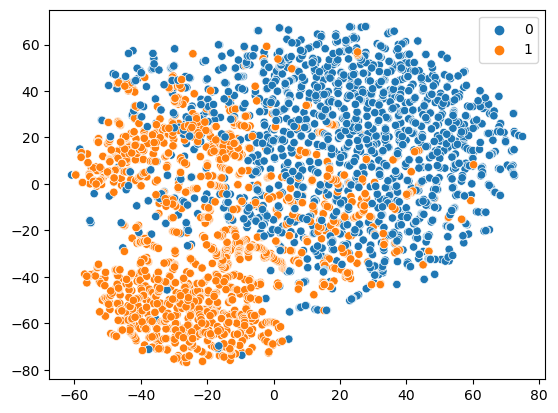

In [30]:
import seaborn as sns
from sklearn.manifold import TSNE

# Reducir la dimensionalidad a 2D utilizando t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_lsa)

# Graficar los clusters
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=kmeans.labels_, legend="full")


## LDA: Latent Dirichlet Allocation

In [50]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Crear un objeto Dictionary y Corpus de Gensim a partir de la matriz de características TF-IDF
corpus = gensim.matutils.Sparse2Corpus(tfidf_matrix, documents_columns=False)
dictionary = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Entrenar un modelo LDA con k=3
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

# Imprimir los temas y las palabras más importantes para cada tema
for topic in lda_model.print_topics():
    print(topic)

# Obtener la distribución de temas para cada documento
# topic_distribution = [lda_model.get_document_topics(corpus[i]) for i in range(len(data_filtrado))]
topic_distribution = [lda_model.get_document_topics(corpus[i], minimum_probability=0.0) for i in range(len(data_filtrado))]

# Asignar cada documento al tema más probable
# cluster_assignments = [max(range(len(doc_topics)), key=lambda x: doc_topics[x][1])[0] for doc_topics in topic_distribution]
# cluster_assignments = [max(range(len(doc_topics)), key=lambda x: doc_topics[x][1])[0] if doc_topics else None for doc_topics in topic_distribution]
# cluster_assignments = [max(range(len(doc_topics)), key=lambda x: doc_topics[x][1])[0] if doc_topics else None for doc_topics in topic_distribution]
cluster_assignments = [max(range(len(doc_topics)), key=lambda x: doc_topics[x][1])[0] if isinstance(doc_topics, list) and doc_topics else None for doc_topics in topic_distribution]

# Imprimir los documentos en cada cluster
for i in range(3):
    cluster_docs = np.array(data_filtrado)[np.array(cluster_assignments) == i]
    print(f"Documentos en el cluster {i}:")
    for doc in cluster_docs:
        print(doc)
    print("\n")

(0, '0.053*"incapac" + 0.045*"daily" + 0.015*"hu" + 0.015*"reunion" + 0.011*"cicl" + 0.011*"qa" + 0.011*"prueb" + 0.009*"equip" + 0.009*"unk" + 0.008*"creacion"')
(1, '0.027*"unk" + 0.014*"prueb" + 0.011*"document" + 0.010*"funcional" + 0.010*"permis" + 0.010*"ambient" + 0.009*"realiz" + 0.009*"ajust" + 0.008*"desarroll" + 0.008*"dat"')
(2, '0.042*"vacacion" + 0.029*"cas" + 0.022*"diseñ" + 0.016*"unk" + 0.014*"prueb" + 0.013*"uso" + 0.011*"sprint" + 0.010*"realiz" + 0.010*"compensatori" + 0.010*"ajust"')


TypeError: 'int' object is not subscriptable